# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В цели данного исследования входят: изучение параметров квартир, времени их продажи, поиск аномалий и исключение редких значений, определение различий между квартирами в центре, анализ квартир в нескольких окологородских населенных пунктах.

Данное исследование разделим на несколько шагов.<br>
### <a href='#section0'>0. Импорт файла и библиотек<br>
### <a href='#section1'>1. Получение общей информации</a><br>
### <a href='#section2'>2. Предобработка данных</a><br>
#### <a href='#section21'>2.1. Изучение пропусков</a><br>
#### <a href='#section22'>2.2. Заполнение пропусков</a><br>
#### <a href='#section23'>2.3. Изменение типов данных</a><br>
### <a href='#section3'>3. Обогащение данных таблицы</a><br>
#### <a href='#section31'>3.1. Подсчет цены квадратного метра</a><br>
#### <a href='#section32'>3.2. Добавление дня, недели и месяца публикации объявления</a><br>
#### <a href='#section33'>3.3. Добавление этажа квартиры</a><br>
#### <a href='#section34'>3.4. Соотношение жилой и общей площади, кухни и общей площади</a><br>
### <a href='#section4'>4. Исследование параметров квартир</a><br>
#### <a href='#section41'>4.1. Площадь</a><br>
#### <a href='#section42'>4.2. Цена</a><br>
#### <a href='#section43'>4.3. Число комнат</a><br>
#### <a href='#section44'>4.4. Высота потолков</a><br>
### <a href='#section5'>5. Исследование времени продажи квартир</a><br>
### <a href='#section6'>6. Поиск редких и выбивающихся значений</a><br>
### <a href='#section7'>7. Исследование факторов, влияющих на стоимость квартир</a><br>
#### <a href='#section71'>7.1. Зависимость от площади</a><br>
#### <a href='#section72'>7.2. Зависимость от числа комнат</a><br>
#### <a href='#section73'>7.3. Зависимость от удаленности от центра</a><br>
#### <a href='#section75'>7.4. Зависимость от этажа: первого, последнего, другого</a><br>
#### <a href='#section76'>7.5. Зависимость от даты размещения: дня недели, месяца и года</a><br>
### <a href='#section8'>8. Исследование цены квартир в окологородских населенных пунктах</a><br>
### <a href='#section9'>9. Исследование квартир центре</a><br>
#### <a href='#section91'>9.1. Анализ изменения цены по степени удаленности от центра</a><br>
#### <a href='#section92'>9.2. Изучение параметров квартир в центре: площадь, цена, число комнат</a><br>
#### <a href='#section93'>9.3. Изучение факторов квартир в центре, влияющих на стоимость: число комнат, этаж, удаленность от центра, дата размещения объявления</a><br>
### <a href='#section10'>Общий вывод</a><br>




### <a id='section0'>0. Импорт файла и библиотек</a>

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### <a id='section1'>1. Получение общей информации</a>

In [2]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В представленном наборе данных имеются значения разных типов. Пропуски имеются в столбцах в столбцах ceiling_height, floors_total, living area, is apartment, balcony, locality_name, kitchen_area, parks_nearest, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, ponds_nearest, days_exposition.

### <a id='section2'>2. Предобработка данных</a>

#### <a id='section21'>2.1. Изучение пропусков</a>

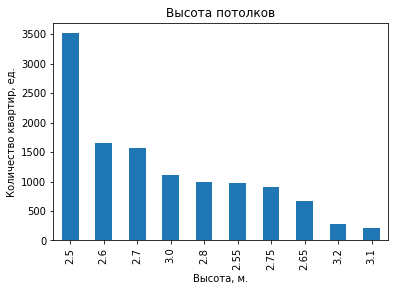

In [4]:
#Изучаем пропуски в столбце 'ceiling_height'
data['ceiling_height'].value_counts().head(10).plot.bar()
plt.title('Высота потолков')
plt.xlabel('Высота, м.')
plt.ylabel('Количество квартир, ед.')
plt.show()

In [5]:
print(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Большинство квартир имеют потолки высотой от 2.52 до 2.80 метров. Встречаются аномальные значения, которые могут иметь характер случайной ошибки заполнения. Существующие пропуски заменим медианным значением. 14504 из 23699 значений пропуски.

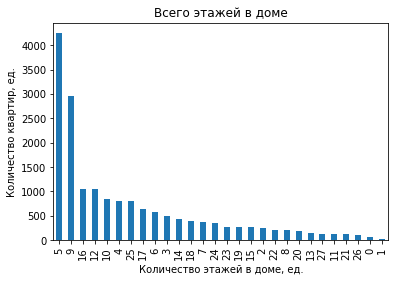

In [81]:
#Изучаем пропуски в столбце 'floors_total'
data['floors_total'].value_counts().plot.bar()
plt.title('Всего этажей в доме')
plt.xlabel('Количество этажей в доме, ед.')
plt.ylabel('Количество квартир, ед.')
plt.show()

23613 из 23699 квартир имеют значения. Часть из них имеют аномальные значения (>28). Поскольку пропусков немного, в дальнейших расчетах, где будет необходимо количество этажей, строки с пропусками будут исключены. Тип данных для этих значений лучше подходит int, а не float.

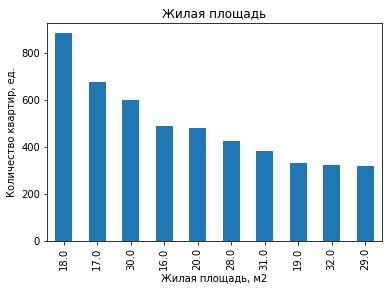

In [7]:
#Изучаем пропуски в столбце 'living_area'
data['living_area'].value_counts().head(10).plot.bar()
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Количество квартир, ед.')
plt.show()

В 21796 из 23699 квартир указана жилая площадь. Недостающие значения целесообразно заменить медианным значением.

In [8]:
#Изучаем пропуски в столбце 'is_apartment'
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Только в 2775 из 23699 квартир указан этот параметр. Из 2775 квартир только 50 являются апартаментами. Возможно, при размещении объявления если это былое помещение, а не апаратменты, это поле вообще не заполнялось. Поэтому существующие пропуски можно заполнить как False.

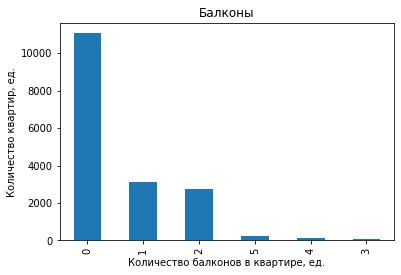

In [82]:
#Изучаем пропуски в столбце 'balcony'
data['balcony'].value_counts().plot.bar()
plt.title('Балконы')
plt.xlabel('Количество балконов в квартире, ед.')
plt.ylabel('Количество квартир, ед.')
plt.show()

В 12180 из 23699 квартир заполнен этот параметр. Наиболее вероятно, пропуски означают что балкона нет. Поэтому заменим их на 0.

In [10]:
#Изучаем пропуски в столбце 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заполнены 23650 из 23699 значений. Встречаются дубликаты. Отсутствующие значения можно удалить.

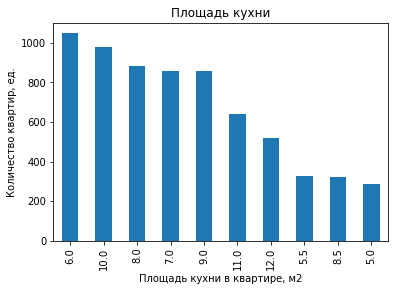

In [83]:
#Изучаем пропуски в столбце 'kitchen_area'
data['kitchen_area'].value_counts().head(10).plot.bar()
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни в квартире, м2')
plt.ylabel('Количество квартир, ед.')
plt.show()

В 21421 из 23699 квартирах указана площадь кухни. Возможно часть пропусков студии?

In [12]:
print(data.groupby('studio')['kitchen_area'].count())

studio
False    21421
True         0
Name: kitchen_area, dtype: int64


Действительно, в 21421 заполненных значениях площади кухни нет студий. Сколько всего студий в датасете?

In [13]:
print(data['studio'].value_counts())

False    23550
True       149
Name: studio, dtype: int64


Для 149 студий можно смело ставить площадь кухни 0, а остальные заполнить разницей между общей и жилой площадью.

Пропуски в столбцах расстояние до ближайшего аэропорта/центра/парков/водоемов.
Все пропуски имеют общую природу, поскольку отсутствуют соизмеримые значения.
airports_nearest        18157 из 23699 заполнено
cityCenters_nearest     18180 из 23699 заполнено
parks_around3000        18181 из 23699 заполнено
ponds_around3000        18181 из 23699 заполнено
Пропуски могут означать, что данные квартиры находятся на очень большом расстоянии от аэропорта/центра/парков/водоемов. Их можно исключить путем категоризации данных.


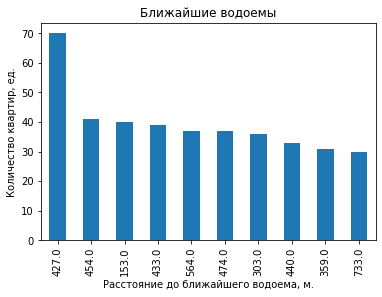

In [14]:
#Изучаем пропуски в столбце 'ponds_nearest'
data['ponds_nearest'].value_counts().head(10).plot.bar()
plt.title('Ближайшие водоемы')
plt.xlabel('Расстояние до ближайшего водоема, м.')
plt.ylabel('Количество квартир, ед.')
plt.show()

Заполнены только 9110 из 23699 значений. Их также можно исключить путем категоризации данных.

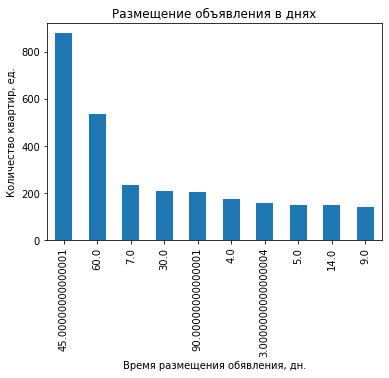

In [15]:
#Изучаем пропуски в столбце 'days_exposition'
data['days_exposition'].value_counts().head(10).plot.bar()
plt.title('Размещение объявления в днях')
plt.xlabel('Время размещения обявления, дн.')
plt.ylabel('Количество квартир, ед.')
plt.show()

Заполнены 20518 из 23699 значений. Это может означать, что объявления еще не сняты с публикации. Заменять на 0 и исключать в расчетах. 

#### Вывод
Пропущенные значения ceiling_height заменим на медианное значение, аномальные значения ceiling_height более 5 метров также заменяем на 0, пропуски floors_total, locality_name из-за немногочисленности можно заменить на 0, также заменяем аномальные значения floors_total (более 28), living area заменить на медианное значение, kitchen_area(за исключением студий) заменить на разницу между общей и жилой площадью,  пропуски is_apartment заменить на False, пропуски balcony заменить на 0, пропуски airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, ponds_nearest имеют схожую природу, они могут означать отсутствие данных объектов вблизи квартиры. Их можно заменить на значение, больше максимального, чтобы в будущем исключать из выборки условием. Пропуски days_exposition заменить на 0.

#### <a id='section22'>2.2. Заполнение пропусков</a>

In [16]:
#Заменяем аномальные значения в столбце 'ceiling_height': человеческую ошибку пропуска точки/запятой можно разделить на 10, а остальные заменить на медианное значение
data.loc[data['ceiling_height'] > 22, 'ceiling_height'] = (data.loc[data['ceiling_height'] > 22, 'ceiling_height']) / 10
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = data['ceiling_height'].median()
#Заменяем пропуски в столбце 'ceiling_height' по формуле, ориентированной на количество этажей в доме
ch_dict = data.groupby(['floors_total','total_area','rooms'])['ceiling_height'].mean().to_dict()
def ch(row):
    if pd.isna(row['ceiling_height']):
        return ch_dict.get((row['floors_total'],row['total_area'],row['rooms']))
    return row['ceiling_height']
data['ceiling_height'] = data.apply(ch, axis=1)
#Заполняем оставшиеся пропуски медианным значением
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [17]:
#Заменяем пропуски в столбце 'floors_total' на 0
data['floors_total'].fillna(0, inplace=True)
#Заменяем аномальные значения в столбце 'floors_total' на 0
data[data['floors_total'] > 28] = 0
#Заменяем пропуски в столбце 'locality_name' на 0
data['locality_name'].fillna(0, inplace=True)
#Заменяем пропуски в столбце 'living_area' на медианное значение
data['living_area'].fillna(data['living_area'].median(), inplace=True)
#Заменяем пропуски в'kitchen_area' в студиях на 0
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)
#Заменяем оставшиеся пропуски в'kitchen_area' на разницу между общей и жилой площадью
data['kitchen_area'].fillna(data['total_area']-data['living_area'], inplace=True)
#Заменяем пропуски в 'is_apartment' на False
data['is_apartment'].fillna(0, inplace=True)
data['is_apartment'] = data['is_apartment'].astype('bool')
#Заменяем пропуски в 'balcony' на 0
data['balcony'].fillna(0, inplace=True)
#Заменяем пропуски в 'days_exposition'
data['days_exposition'].fillna(0, inplace=True)

In [18]:
#Определяем максимальное значение в группе "расстояния до объектов"
display(data[['cityCenters_nearest', 'airports_nearest', 'parks_around3000', 'ponds_around3000','parks_nearest', 'ponds_nearest']].max().max())

84869.0

In [19]:
#Заменяем пропуски на значение 99999 (больше максимального)
data['cityCenters_nearest'].fillna(99999, inplace=True)
data['airports_nearest'].fillna(99999, inplace=True)
data['parks_around3000'].fillna(99999, inplace=True)
data['ponds_around3000'].fillna(99999, inplace=True)
data['parks_nearest'].fillna(99999, inplace=True)
data['ponds_nearest'].fillna(99999, inplace=True)

In [20]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null object
open_plan               23699 non-null object
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_aroun

None

#### <a id='section23'>2.3. Изменение типов данных</a>

In [21]:
data['last_price'] = data['last_price']/1000
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['studio'] = data['studio'].astype('bool')
data['open_plan'] = data['open_plan'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,99999,0,99999,81
2,10,5196.0,56.00,2015-08-20,2,2.74,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900.0,159.00,2015-07-24,3,2.65,14,30.00,9,False,...,129.00,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,99999,99999,99999,99999,99999,99999,55
6,6,3700.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996,19143,0,99999,0,99999,155
7,5,7915.0,71.60,2019-04-18,2,2.65,24,30.00,22,False,...,18.90,2,Санкт-Петербург,23982,11634,0,99999,0,99999,0
8,20,2900.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,99999,99999,99999,99999,99999,99999,189
9,18,5400.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898,15008,0,99999,0,99999,289


### Вывод

Непрерывные значения (кроме расстояний до объектов) оставлены во float, дискретные переведены в int, добавлен столбец времени (дата первого размещения), тип столбцов 'open_plan', 'studio', 'is_apartment' - bool. Столбец 'last_price' разделен на 1000 для удобство восприятия(теперь цены не 6-значных суммах, а в трех-значных).

### <a id='section3'>3. Обогащение данных таблицы</a>

#### <a id='section31'>3.1. Подсчет цены квадратного метра</a>

In [22]:
#Считаем квадратный метр, разделив последнюю цену на общую площадь
data['m2price'] = (data['last_price']/data['total_area']).round(2)
display(data['m2price'].head(10))

0    120.37
1     82.92
2     92.79
3    408.18
4    100.00
5     95.07
6     99.20
7    110.54
8     87.45
9     88.52
Name: m2price, dtype: float64

#### <a id='section32'>3.2. Добавление дня, недели и месяца публикации объявления</a>

In [23]:
#Получаем день недели и прибавляем 1, чтобы получить понедельник был первым днем, а не нулевым
data['first_weekday_exposition'] = data['first_day_exposition'].dt.weekday + 1
#Получаем месяц
data['first_month_exposition'] = data['first_day_exposition'].dt.month
#Получаем год
data['first_year_exposition'] = data['first_day_exposition'].dt.year
display(data[['first_weekday_exposition', 'first_month_exposition', 'first_year_exposition']].head(10))

,first_weekday_exposition,first_month_exposition,first_year_exposition
0,4,3,2019
1,2,12,2018
2,4,8,2015
3,5,7,2015
4,2,6,2018
5,1,9,2018
6,4,11,2017
7,4,4,2019
8,3,5,2018
9,7,2,2017


#### <a id='section33'>3.3. Добавление этажа квартиры</a>

In [24]:
#Создаем функцию, которая определяет тип этажа (первый, последний, другой) и применяем ее к датафрейму
def floor_type(x):
    if x['floor'] == 1:
        return 'Первый'
    elif x['floor'] == x['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
data['floor_type'] = data.apply(floor_type, axis=1)
display(data['floor_type'].head(100))

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
        ...    
95    Последний
96       Другой
97    Последний
98       Другой
99       Другой
Name: floor_type, Length: 100, dtype: object

#### <a id='section34'>3.4. Соотношение жилой и общей площади, кухни и общей площади</a>

In [25]:
#Определяем соотношение жилой и общей площади и сохраняем значение в новый столбец
data['living_total_ratio'] = data['living_area']/data['total_area']
#Определяем соотношение кухни и общей площади и сохраняем значение в новый столбец
data['kitchen_total_ratio'] = data['kitchen_area']/data['total_area']
display(data[['living_total_ratio', 'kitchen_total_ratio']].head(10))

,living_total_ratio,kitchen_total_ratio
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
3,0.188679,0.811321
4,0.320000,0.410000
5,0.473684,0.299342
6,0.284182,0.386059
7,0.418994,0.263966
8,0.465320,0.265682
9,0.714754,0.106557


### Вывод

В таблицу добавлены цена квадратного метра, день недели, месяц и год публикации объявления, тип этажа и соотношение жилой площади к общей, площади кухни к общей.

### <a id='section4'>4. Исследование параметров квартир</a>

#### <a id='section41'>4.1. Площадь</a>

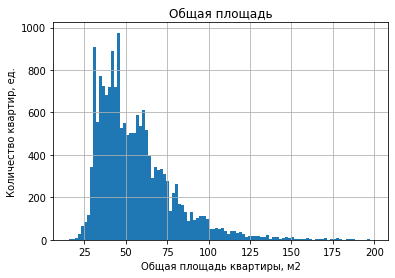

In [84]:
data['total_area'].describe()
#создаем гистограмму
data['total_area'].hist(bins=100)
plt.title('Общая площадь')
plt.xlabel('Общая площадь квартиры, м2')
plt.ylabel('Количество квартир, ед.')
plt.show()

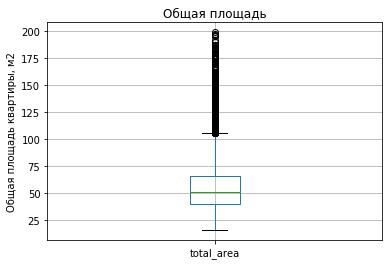

In [85]:
#Создаем ящик с усами
data.query('(300 > total_area) & (total_area > 10)').boxplot('total_area')
plt.title('Общая площадь')
plt.ylabel('Общая площадь квартиры, м2')
plt.show()

Гистограмма показала, что значения 'total_area' скошены вправо. Это связано с тем, что на рынке существуют немногочисленные предложения объектов с очень большой площадью в то время как 50% объектов имеют площадь от 40 до 69 м2. Ящик с усами показывает, что выбросы имеют площадь более 110 м2.

#### <a id='section42'>4.2. Цена</a>

In [28]:
data['last_price'].describe()

count     23699.000000
mean       6532.439536
std       10889.447255
min           0.000000
25%        3400.000000
50%        4630.000000
75%        6775.000000
max      763000.000000
Name: last_price, dtype: float64

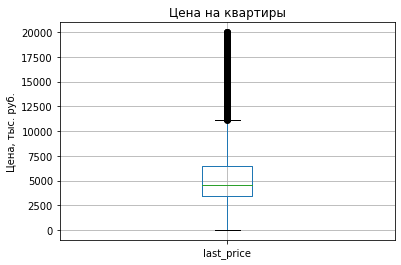

In [29]:
#Создаем ящик с усами
data.query('last_price < 20000').boxplot('last_price')
plt.title('Цена на квартиры')
plt.ylabel('Цена, тыс. руб.')
plt.show()

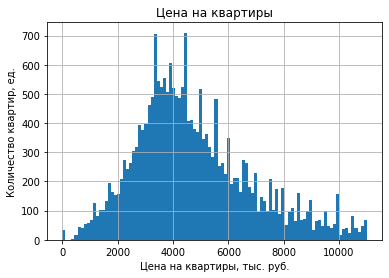

In [30]:
#создаем гистограмму
data.query('last_price < 11000')['last_price'].hist(bins=100)
plt.title('Цена на квартиры')
plt.xlabel('Цена на квартиры, тыс. руб.')
plt.ylabel('Количество квартир, ед.')
plt.show()

Распределение нормальное. Гистограмма цены также незначитеьно скошена вправо. Это связано с имеющимся предложением дорогих объектов на рынке. Половина объектов имеет стоимость от 3400 до 6752 тыс. руб. Ящик с усами показывает, что за пределами 11 000 тыс. руб. находятся выбросы. Наблюдаются аномальные пики значений в районе психологических ценовых границ (3000 тыс., 5000 тыс., 6000 тыс), но их исключать не следует. Аномальные значения встречаются менее 100 тыс. - вероятно, человеческая ошибка. Их следует исключить.

In [31]:
#Проверим цену квадратного метра
data['m2price'].describe()

count    23666.000000
mean        99.405247
std         50.337018
min          0.110000
25%         76.560000
50%         94.970000
75%        114.247500
max       1907.500000
Name: m2price, dtype: float64

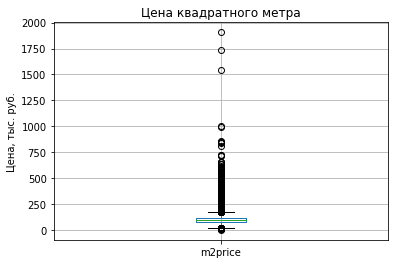

In [32]:
#Построим ящик с усами для m2price
data.boxplot('m2price')
plt.title('Цена квадратного метра')
plt.ylabel('Цена, тыс. руб.')
plt.show()

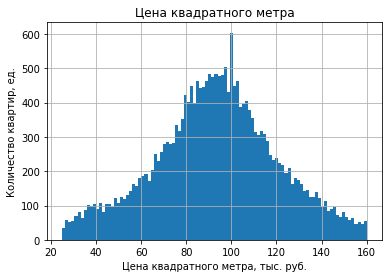

In [33]:
#Построим гистограмму для m2price
data.query('(m2price > 25) & (m2price < 160)')['m2price'].hist(bins=100)
plt.title('Цена квадратного метра')
plt.xlabel('Цена квадратного метра, тыс. руб.')
plt.ylabel('Количество квартир, ед.')
plt.show()

Выбросам по цене квадратного метра являются объекты с ценой менее 25 000 /м2 и более 160 000. Встречается аномальное значение 100000/м2, которое является психологическим. Его удалять не будем.

#### <a id='section43'>4.3. Число комнат</a>

In [34]:
data['rooms'].describe()

count    23699.000000
mean         2.068231
std          1.080690
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

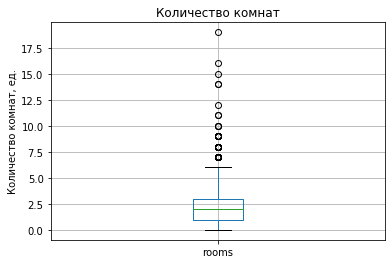

In [35]:
#Создаем ящик с усами
data.boxplot('rooms')
plt.title('Количество комнат')
plt.ylabel('Количество комнат, ед.')
plt.show()

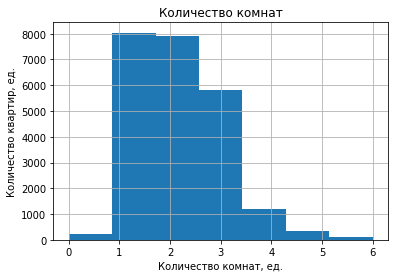

In [36]:
#Создаем гистограмму
data.query('rooms < 7')['rooms'].hist(bins = 7)
plt.title('Количество комнат')
plt.xlabel('Количество комнат, ед.')
plt.ylabel('Количество квартир, ед.')
plt.show()

Ящик с усами показал, что квартиры с более чем 6 комнатами относятся к выбросам. Подавляющее большинство объектов относятся к 1,2,3 комнатным квартирам. Гистограмма незначительно скошена вправо за счет предложений квартир с большим количеством комнат.

#### <a id='section44'>4.4. Высота потолков</a>

In [37]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.696952
std          0.252859
min          0.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64

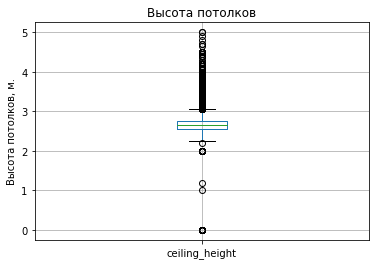

In [38]:
data.boxplot('ceiling_height')
plt.title('Высота потолков')
plt.ylabel('Высота потолков, м.')
plt.show()

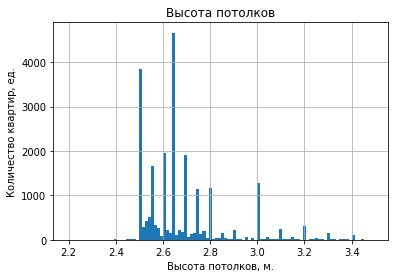

In [39]:
data.query('(ceiling_height > 2)&(ceiling_height < 3.5)')['ceiling_height'].hist(bins=100)
plt.title('Высота потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Количество квартир, ед.')
plt.show()

50% объектов имеют высоту потолков от 2.55 до 2.75 м. Ящик с усами показал, что выбросы находятся ниже 2.5 метра и выше 3 метров. Гистограмма незначительно скошена вправо за счет предложения квартир с высокими потолками. Встречаются пиковые аномальные значения, что может быть связано с определенной плановой высотой потолков для типовых квартир.

### Вывод

Половина объектов являются 1,2,3 комнатными квартирами, имеют площадь от 40 до 69 м2, цену от 3,4 до 6,75 млн, стоимость квадратного метра от 25000 до 160000, высоту потолков от 2.55 до 2.75 м.

### <a id='section5'>5. Исследование времени продажи квартир</a>

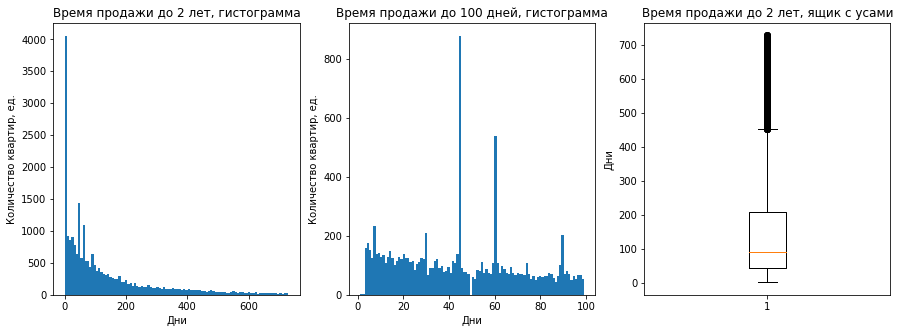

In [40]:
plt.figure(figsize=(15,5))
 
plt.subplot(1, 3, 1)
plt.hist(data.query('days_exposition < 730')['days_exposition'], bins=100)
plt.title("Время продажи до 2 лет, гистограмма")
plt.xlabel("Дни")
plt.ylabel("Количество квартир, ед.")

plt.subplot(1, 3, 2)
plt.hist(data.query('(days_exposition < 100) & (days_exposition > 0)')['days_exposition'], bins=100)
plt.title("Время продажи до 100 дней, гистограмма")
plt.xlabel("Дни")
plt.ylabel("Количество квартир, ед.")

plt.subplot(1, 3, 3)
plt.boxplot(data.query('(days_exposition < 730) & (days_exposition > 0)')['days_exposition'])
plt.title("Время продажи до 2 лет, ящик с усами")
plt.ylabel("Дни")
plt.show()

### Вывод

Половина объектов продается в период от 50 до 200 дней. Соответственно по ящику с усами определяем, что быстрые продажи совершаются в срок до 7 дней, а долгие более 450 дней. Встречаются аномальные пиковые значения - 7, 30, 45, 60, 90 дней. Это может связано с условиями размещения/продления объявлений. Их можно будет исключить. То есть, объект снимается не после фактической продажи, а после завершения показов в рамках рекламного размещения. Аномальный пик в районе 0 на первом графике означает активные объявления, которые пока не сняты с показов.

### <a id='section6'>6. Поиск редких и выбивающихся значений</a>

In [41]:
#Исключаем выбросы last_price со значением более 20 млн и до 100 тысяч рублей
data = data[(data['last_price'] < 20000) & (data['last_price'] > 100)]
#Исключим выбросы по m2price со значением менее 25 000 руб и более 160 000 руб за м2
data = data[(data['m2price'] < 160) & (data['m2price'] > 25)]
#Исключаем выбросы total_area со значением более 200 м2 и менее 10м2
data = data[(data['total_area'] < 200) & (data['total_area'] > 10)]
#Исключаем выбросы rooms со значением более 6 комнат
data = data[data['rooms'] < 6]
#Исключаем выбросы ceiling_height со значением более 5 метров
data = data[data['ceiling_height'] < 5]
#Исключаем выбросы floors_total со значением более 28 этажей
data = data[data['floors_total'] < 28]
#Исключаем выбивающиеся значения где living_area больше total_area
data = data[data['total_area'] > data['living_area']]
#Исключаем апартаменты
data = data[data['is_apartment'] != True]
#Исключаем выбросы days_exposition со значениями очень быстрой (до 7 дней, но оставляем 0 - поскольку они еще не сняты) и очень долгой продажи (более 450 дней) , а также аномальные пики 7, 30, 45, 60, 90 дней
data = data[((data['days_exposition'] > 7) | (data['days_exposition'] == 0)) & (data['days_exposition'] < 450)]
data = data[(data['days_exposition'] != 7) & (data['days_exposition'] != 30) & (data['days_exposition'] != 45) & (data['days_exposition'] != 60) & (data['days_exposition'] != 90) ]
data.count()


total_images                17342
last_price                  17342
total_area                  17342
first_day_exposition        17342
rooms                       17342
ceiling_height              17342
floors_total                17342
living_area                 17342
floor                       17342
is_apartment                17342
studio                      17342
open_plan                   17342
kitchen_area                17342
balcony                     17342
locality_name               17342
airports_nearest            17342
cityCenters_nearest         17342
parks_around3000            17342
parks_nearest               17342
ponds_around3000            17342
ponds_nearest               17342
days_exposition             17342
m2price                     17342
first_weekday_exposition    17342
first_month_exposition      17342
first_year_exposition       17342
floor_type                  17342
living_total_ratio          17342
kitchen_total_ratio         17342
dtype: int64

### Вывод

После исключения выбросов и выбивающихся значение в нашем датасете осталось 17342 значений.

### <a id='section7'>7. Исследование факторов, влияющих на стоимость квартир</a>

#### <a id='section71'>7.1. Зависимость от площади</a>

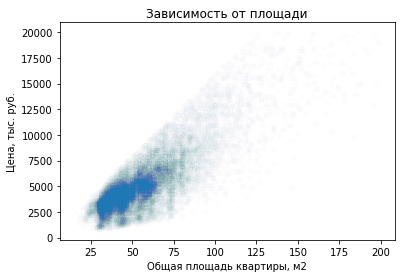

In [86]:
data.plot(x='total_area', y='last_price', alpha=0.007, kind='scatter')
plt.title('Зависимость от площади')
plt.xlabel('Общая площадь квартиры, м2')
plt.ylabel('Цена, тыс. руб.')
plt.show()

Зависимость положительная - чем больше площадь, тем выше цена. Сама большая однородная группа объектов имеет площадь 30м2 и цену в районе 3 млн (вероятно, однокомнатные квартиры).

#### <a id='section72'>7.2. Зависимость от числа комнат</a>

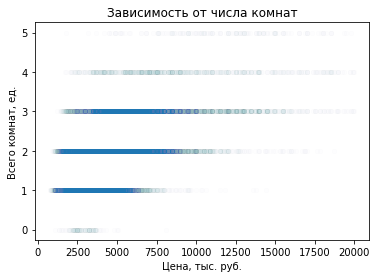

In [65]:
data.plot(y='rooms', x='last_price', alpha=0.007, kind='scatter')
plt.title('Зависимость от числа комнат')
plt.xlabel('Цена, тыс. руб.')
plt.ylabel('Всего комнат, ед.')
plt.show()

Зависимость положительная, чем больше комнат - тем больше цена квартиры. Стоит отметить, что разрыв цен между 2,3,4 комнатными квартирами меньше, чем между 1 и 2 комнатными.

#### <a id='section73'>7.3. Зависимость от удаленности от центра</a>

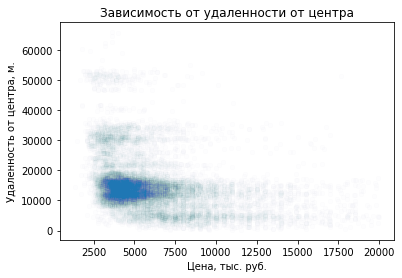

In [67]:
data.query('cityCenters_nearest < 99999').plot(y='cityCenters_nearest', x='last_price', alpha=0.007, kind='scatter')
plt.title('Зависимость от удаленности от центра')
plt.xlabel('Цена, тыс. руб.')
plt.ylabel('Удаленность от центра, м.')
plt.show()

Объектов, которые ближе к центру меньше и цена на них выше. Можно разделить все объекты на три группы: до 10 км (самая высокая цена), самая большая группа 10-20 км от центра (спальные районы, средняя цена), свыше 20 км (пригороды, наименьшая цена). 

#### <a id='section74'>7.4. Зависимость от этажа: первого, последнего, другого</a>

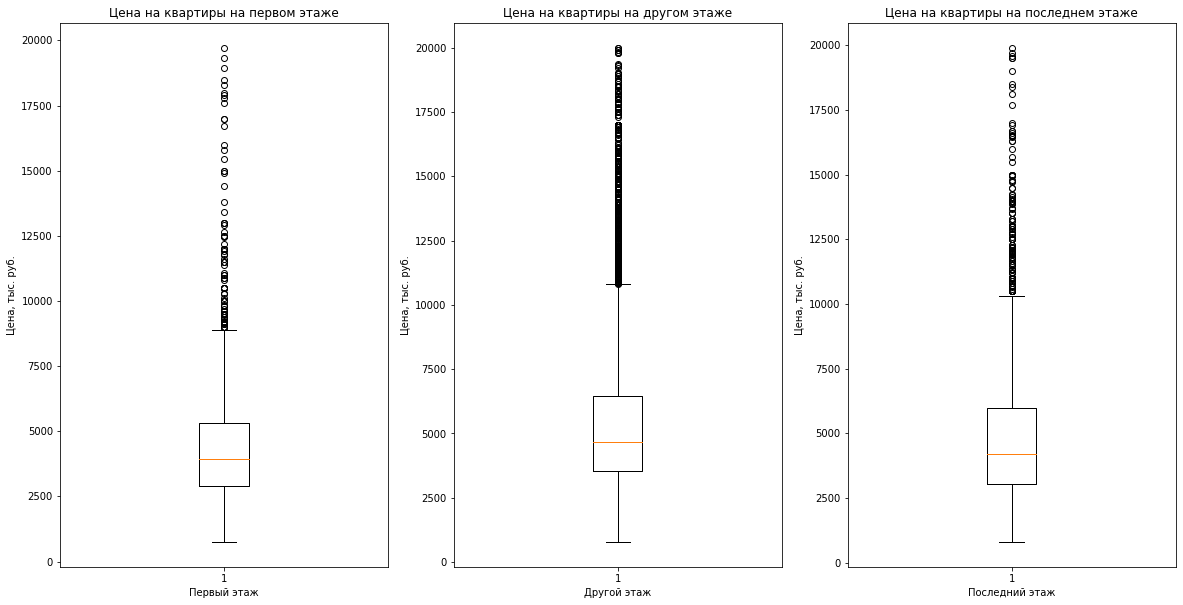

In [70]:
plt.figure(figsize=(20, 10))
 
plt.subplot(1, 3, 1)
plt.boxplot(data.query('floor_type == "Первый"')['last_price'])
plt.title("Цена на квартиры на первом этаже")
plt.xlabel("Первый этаж")
plt.ylabel('Цена, тыс. руб.')

plt.subplot(1, 3, 2)
plt.boxplot(data.query('floor_type == "Другой"')['last_price'])
plt.title("Цена на квартиры на другом этаже")
plt.xlabel("Другой этаж")
plt.ylabel('Цена, тыс. руб.')

plt.subplot(1, 3, 3)
plt.boxplot(data.query('floor_type == "Последний"')['last_price'])
plt.title("Цена на квартиры на последнем этаже")
plt.xlabel("Последний этаж")
plt.ylabel('Цена, тыс. руб.')

plt.show()

Покупатели готовы платить больше за квартиры на другом этаже, чем на первом или последнем. Цена на квартиры на последнем этаже, как правило выше, чем на первом. Но и размах цен на последний этаж больше, чем на первый. Это означает, что при некоторых обстоятельствах покупатели готовы заплатить больше за первый этаж, чем за последний, при прочих равных факторах (это может быть большая высотность здания или состояние крыши).

#### <a id='section75'>7.5. Зависимость от даты размещения: дня недели, месяца и года</a>

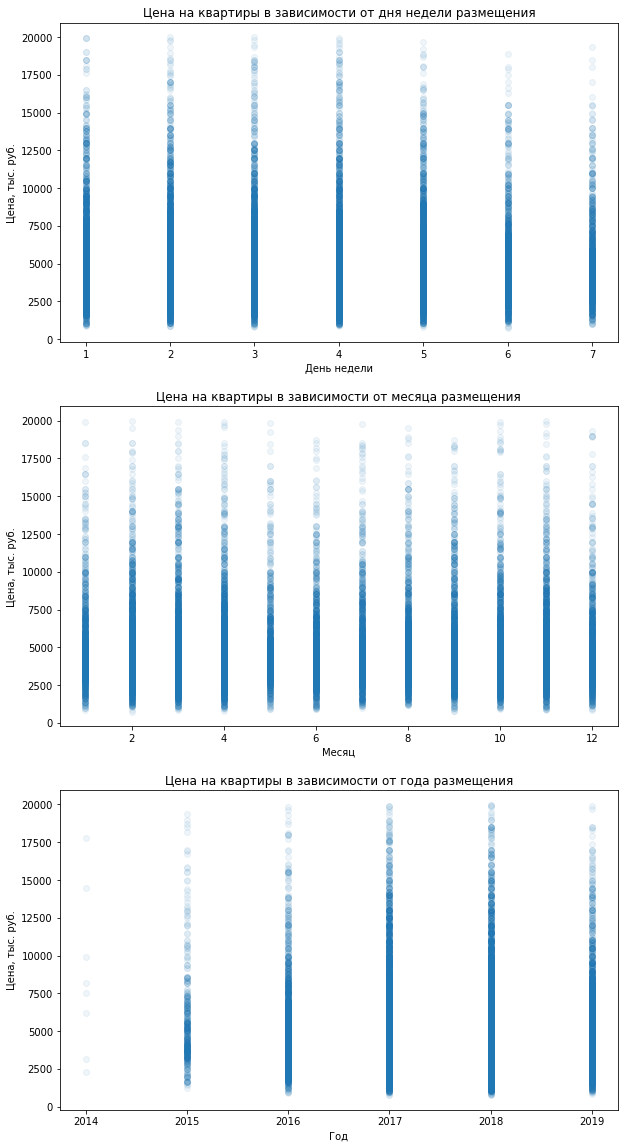

In [73]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.scatter(x=data['first_weekday_exposition'], y=data['last_price'], alpha=0.07)
plt.title("Цена на квартиры в зависимости от дня недели размещения")
plt.xlabel("День недели")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 1, 2)
plt.scatter(x=data['first_month_exposition'], y=data['last_price'], alpha=0.07)
plt.title("Цена на квартиры в зависимости от месяца размещения")
plt.xlabel("Месяц")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 1, 3)
plt.scatter(x=data['first_year_exposition'], y=data['last_price'], alpha=0.07)
plt.title("Цена на квартиры в зависимости от года размещения")
plt.xlabel("Год")
plt.ylabel("Цена, тыс. руб.")

plt.show()


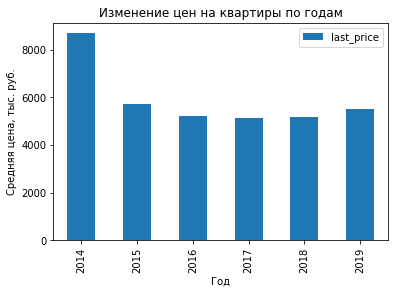

In [75]:
#Посмотрим изменение средней цены от года к году
data.pivot_table(index='first_year_exposition', values='last_price', aggfunc='mean').plot.bar()
plt.title("Изменение цен на квартиры по годам")
plt.xlabel("Год")
plt.ylabel('Средняя цена, тыс. руб.')
plt.show()

In [48]:
print(data['first_weekday_exposition'].corr(data['last_price']), data['first_month_exposition'].corr(data['last_price']), data['first_year_exposition'].corr(data['last_price']))

-0.01567930504813528 -0.005159610891141734 0.013893523315939939


Явной зависимости цены с временем размещения нет. Большинство объектов размещаются с понедельника по пятницу (рабочие дни риелэторов), с февраля по апрель и с сентября по ноябрь (лето не очень удобное время для сделок), а также в 2017,2018 году в сравнении с 2017,2019 (возможно, в 2017 году еще было мало размещений на данной площадке, а данные 2019 года по продажам дополнятся в 2020 году). Средняя цена на объекты понижалась в течение 2014-2017 гг. и незначительно выросла в 2018-2019гг. Общая тенденция может быть связана с изменением цен на рынке. А Цена в 2014-2015 гг. выше возможно потому, что размещали в основном дорогие объекты на площадке, что может отражать специфику тарифных планов того времени или точечную работу пользователей по размещению только части объектов.

### Вывод

Цена положительно зависит от площади и количества комнат, и отрицательно от расстояния от центра. Дешевле всего стоят квартиры на первых этажах, затем на последних, и самые дорогие - квартиры на других этажах. Зависимости цены от времени публикации нет.

### <a id='section8'>8. Исследование цены квартир в окологородских населенных пунктах</a>

In [49]:
#Определяем то 10 населенных пунктов после Санкт-Петербурга по количеству объявлений
data_localities = data.groupby('locality_name')[['m2price']].count().sort_values('m2price',ascending=False)
display(data_localities.head(11))

,m2price
locality_name,
Санкт-Петербург,11337
посёлок Мурино,408
посёлок Шушары,353
Всеволожск,316
Пушкин,293
Колпино,268
посёлок Парголово,244
Гатчина,238
деревня Кудрово,220


In [50]:
#Заменяем дубликаты для ряда пунктов, чтобы получить более точные данные
data['locality_name'].replace(to_replace = ['поселок Мурино', 'Мурино'], value='посёлок Мурино', inplace=True)
data['locality_name'].replace(to_replace = 'Кудрово', value='деревня Кудрово', inplace=True)

In [51]:
#Создаем подсет на основе полученных локаций
top_10_locs = ['посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг', 'Петергоф']
data_subset_locs = data.query('locality_name in @top_10_locs')
#Определяем самые дорогие и самые дешевые из данных локаций
data_subset_locs_pivot = data_subset_locs.pivot_table(index='locality_name', values='m2price', aggfunc='mean')
display(data_subset_locs_pivot.sort_values(by='m2price', ascending=False))

,m2price
locality_name,
Пушкин,101.452048
деревня Кудрово,95.198214
посёлок Парголово,89.826393
посёлок Мурино,86.187962
Петергоф,83.912733
посёлок Шушары,79.042918
Колпино,75.313582
Гатчина,69.090210
Всеволожск,67.258386


### Вывод

К наиболее дорогим пригородам относятся Пушкин и деревня Кудрово, а к дешевым - Гатчина, Всеволожск и Выборг. Это может быть связано с тем, что эти пригороды находятся территориально ближе к Санкт-Петербургу, а также обладают обладают такими преимуществами, как исторические достопримечательности(Пушкин), новый жилой фонд (деревня Кудрово).

### <a id='section9'>9. Исследование квартир в центре</a>

#### <a id='section91'>9.1. Анализ изменения цены по степени удаленности от центра</a>

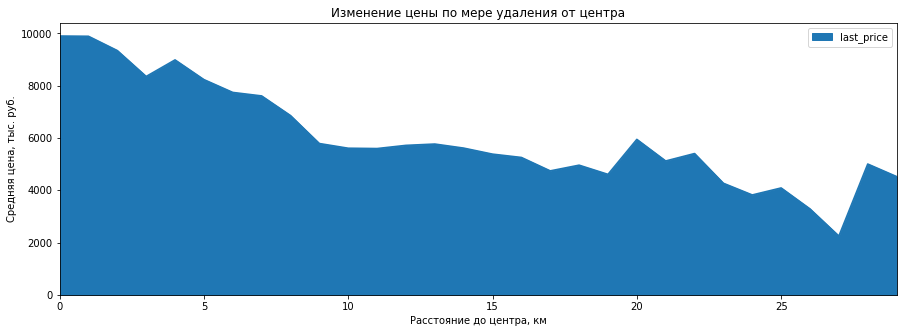

In [76]:
#Создаем новый столбец 'cityCenters_nearest', где будут округлены значения
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype('int')
#Выделяем квартиры Санкт-Петербурга в отдельный сегмент
data_spb = data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'] < 99999)]
#Определяем среднюю цену на объект для различных расстояний от центра в километрах
data_spb_pivot_last_price = data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
data_spb_pivot_last_price.plot(y='last_price', figsize = (15, 5), kind='area')
plt.title("Изменение цены по мере удаления от центра")
plt.xlabel("Расстояние до центра, км")
plt.ylabel('Средняя цена, тыс. руб.')
plt.show()

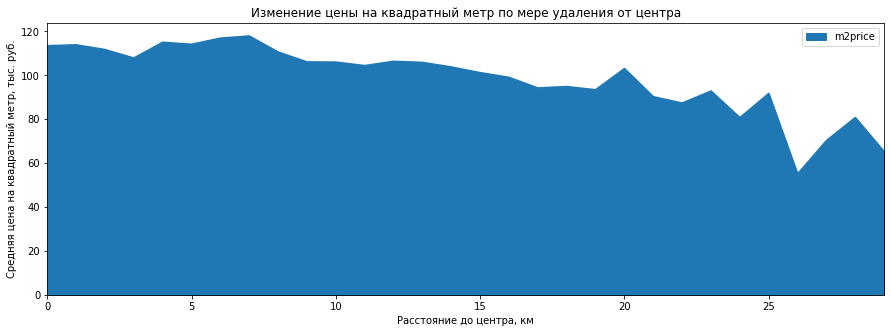

In [77]:
#Определяем среднюю цену на квадратный метр для различных расстояний от центра в километрах
data_spb_pivot_m2price = data_spb.pivot_table(index='cityCenters_nearest_km', values='m2price', aggfunc='mean')
data_spb_pivot_m2price.plot(y='m2price', figsize = (15, 5), kind='area')
plt.title("Изменение цены на квадратный метр по мере удаления от центра")
plt.xlabel("Расстояние до центра, км")
plt.ylabel('Средняя цена на квадратный метр, тыс. руб.')
plt.show()

### Вывод

Глядя на графики, можем сделать вывод что граница центра проходит на отметке 9 км. После этой отметки снижение цены замедляется. Более отчетливо это видно на параметре цены объекта, чем на параметре квадратный метр. Это может быть связано с различием площади объектов в центре и за пределами.

#### <a id='section92'>9.2. Изучение параметров: площадь, цена, число комнат</a>

In [54]:
#Выделяем сегмент квартир в центре Санкт-Петербурга
data_spb_center = data_spb[data_spb['cityCenters_nearest_km'] < 10]
display(data_spb_center['cityCenters_nearest_km'].count())

2994

In [55]:
#Выделяем сегмент квартир в Санкт-Петербурге (без центра)
data_spb_not_center = data_spb[data_spb['cityCenters_nearest_km'] > 9]
display(data_spb_not_center['cityCenters_nearest_km'].count())

8308

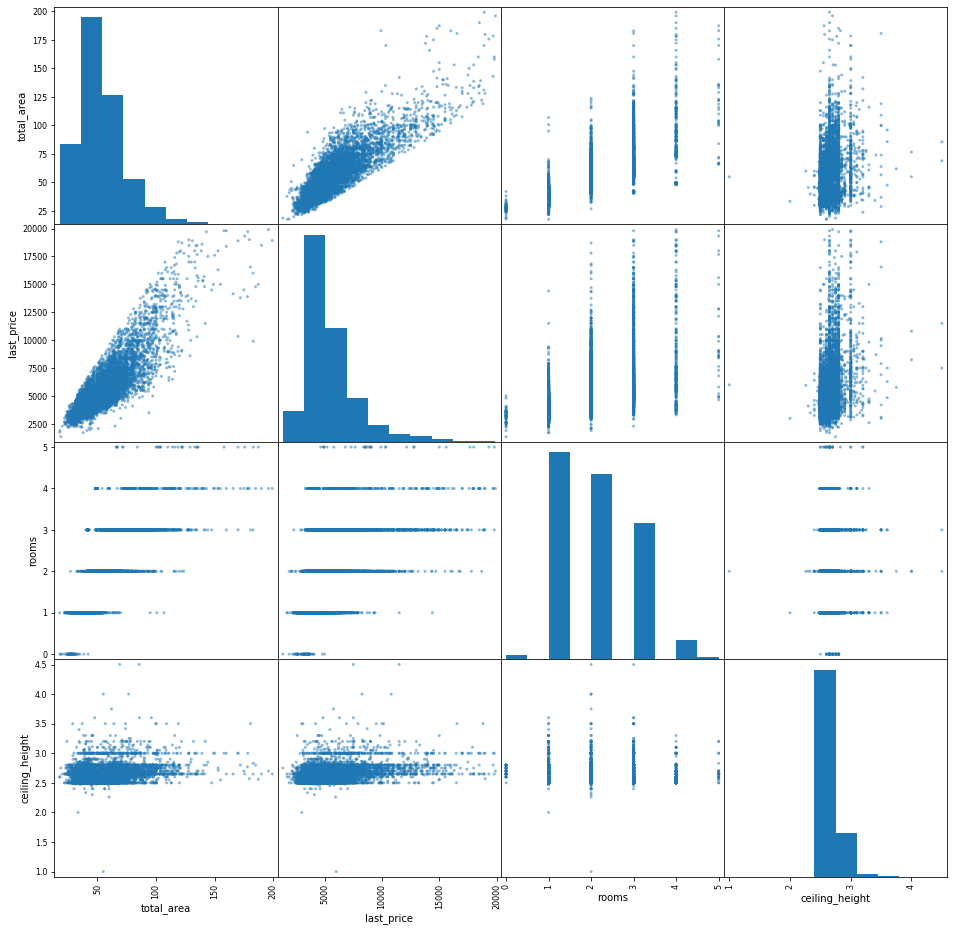

In [79]:
#Строим матрицу диаграмм рассеяния для квартир в Санкт-Петербурге (исключен центр)
pd.plotting.scatter_matrix(data_spb_not_center[['total_area', 'last_price', 'rooms', 'ceiling_height']], figsize = (16, 16))
plt.show()

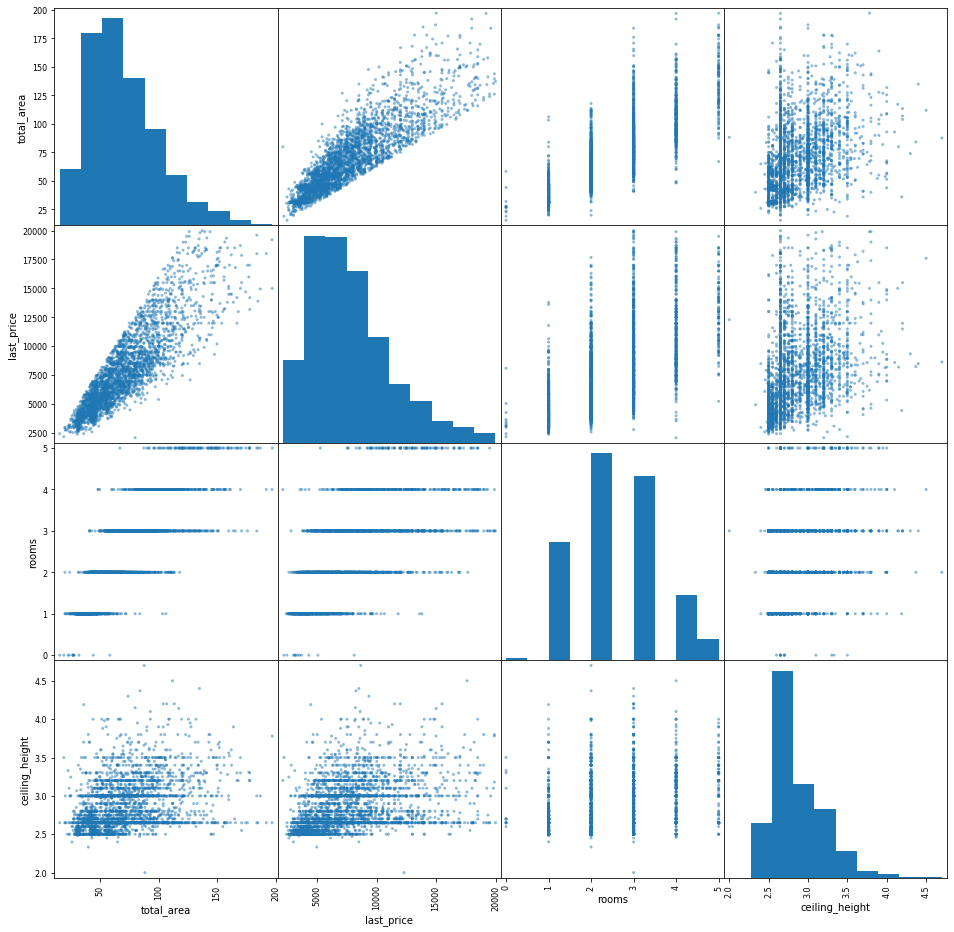

In [57]:
#Строим матрицу диаграмм рассеяния для квартир в центре Санкт-Петербурга
pd.plotting.scatter_matrix(data_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']], figsize = (16, 16))
plt.show()

Квартиры в центре отличаются большей площадью, более высокой ценой, количеством комнат и высотой потолков. Цена для квартир по площади в центре имеет меньший разброс, чем за пределами центра (поскольку в таких объектах более важен сам факт расположения).

#### <a id='section93'>9.3. Изучение факторов, влияющих на стоимость: число комнат, этаж, удаленность от центра, дата размещения объявления</a>

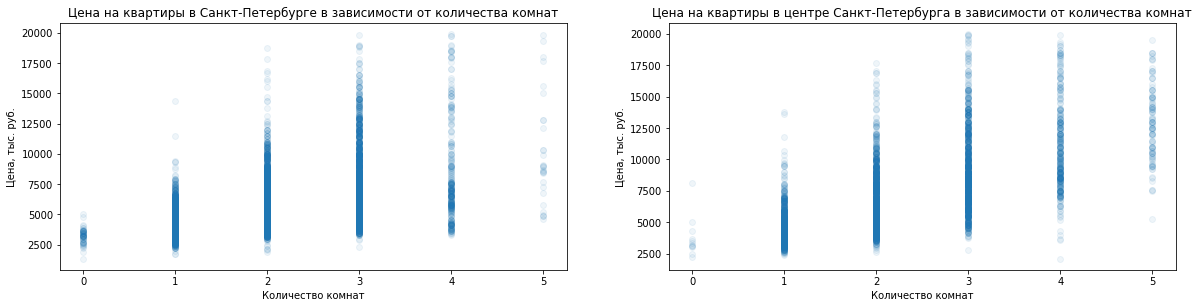

In [58]:
#Определяем различия в цене в зависимости от количества комнат для квартир в Санкт-Петербурге и центре Санкт-Петербурга
plt.figure(figsize=(20, 10))
 
plt.subplot(2, 2, 1)
plt.scatter(x=data_spb_not_center['rooms'], y=data_spb_not_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры в Санкт-Петербурге в зависимости от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(2, 2, 2)
plt.scatter(x=data_spb_center['rooms'], y=data_spb_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры в центре Санкт-Петербурга в зависимости от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена, тыс. руб.")

plt.show()

В центре продажется больше 4-х и 5-комнатных квартир. Это связано с исторической застройкой и планировками того времени.

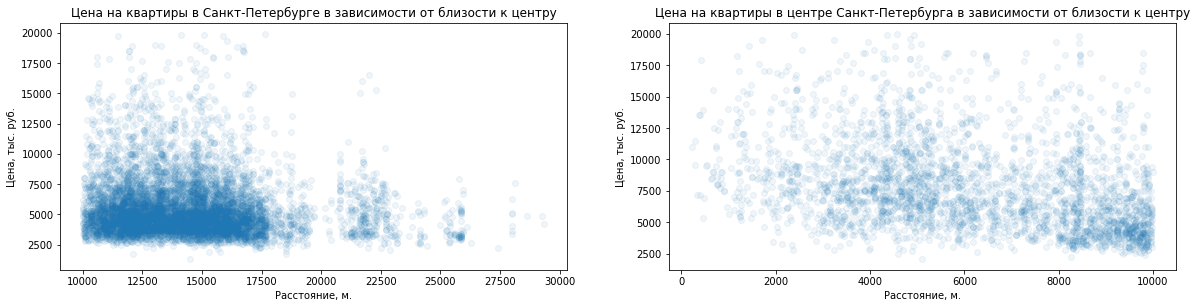

In [59]:
#Определяем различия в цене в зависимости от близости к центра для квартир в Санкт-Петербурге и центре Санкт-Петербурга
plt.figure(figsize=(20, 10))
 
plt.subplot(2, 2, 1)
plt.scatter(x=data_spb_not_center['cityCenters_nearest'], y=data_spb_not_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры в Санкт-Петербурге в зависимости от близости к центру")
plt.xlabel("Расстояние, м.")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(2, 2, 2)
plt.scatter(x=data_spb_center['cityCenters_nearest'], y=data_spb_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры в центре Санкт-Петербурга в зависимости от близости к центру")
plt.xlabel("Расстояние, м.")
plt.ylabel("Цена, тыс. руб.")

plt.show()

Если удаленность от центра на больших расстояниях существенно влияет на цену, то на расстоянии до 9 км нет прямой взаимосвязи. То есть, если объект уже находится в раидусе центра, более важными становятся другие факторы.

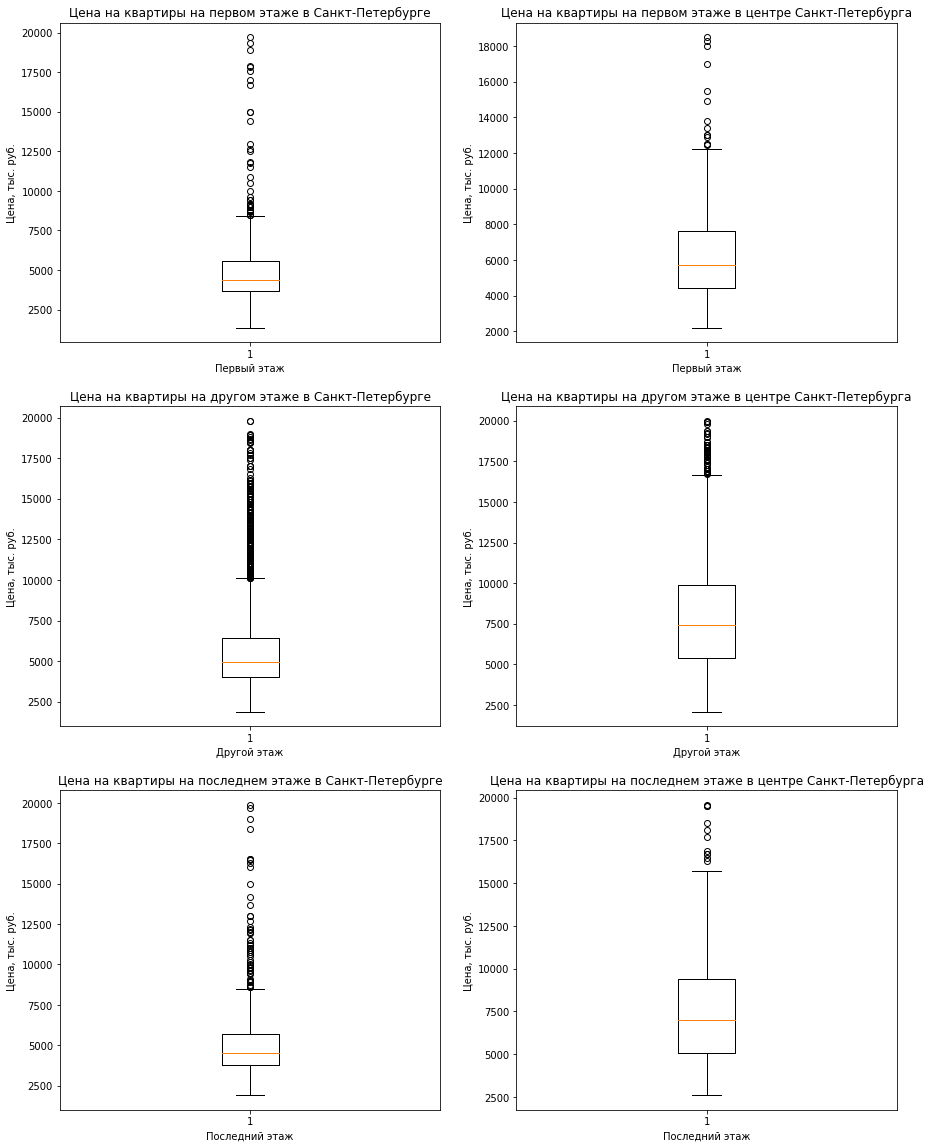

In [60]:
#Определяем различия в цене в зависимости от этажа для квартир в Санкт-Петербурге и центре Санкт-Петербурга
plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
plt.boxplot(data_spb_not_center.query('floor_type == "Первый"')['last_price'])
plt.title("Цена на квартиры на первом этаже в Санкт-Петербурге")
plt.xlabel("Первый этаж")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 2)
plt.boxplot(data_spb_center.query('floor_type == "Первый"')['last_price'])
plt.title("Цена на квартиры на первом этаже в центре Санкт-Петербурга")
plt.xlabel("Первый этаж")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 3)
plt.boxplot(data_spb_not_center.query('floor_type == "Другой"')['last_price'])
plt.title("Цена на квартиры на другом этаже в Санкт-Петербурге")
plt.xlabel("Другой этаж")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 4)
plt.boxplot(data_spb_center.query('floor_type == "Другой"')['last_price'])
plt.title("Цена на квартиры на другом этаже в центре Санкт-Петербурга")
plt.xlabel("Другой этаж")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 5)
plt.boxplot(data_spb_not_center.query('floor_type == "Последний"')['last_price'])
plt.title("Цена на квартиры на последнем этаже в Санкт-Петербурге")
plt.xlabel("Последний этаж")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 6)
plt.boxplot(data_spb_center.query('floor_type == "Последний"')['last_price'])
plt.title("Цена на квартиры на последнем этаже в центре Санкт-Петербурга")
plt.xlabel("Последний этаж")
plt.ylabel("Цена, тыс. руб.")

plt.show()

Покупатели квартир в центре также предпочитают платить больше за квартиру на другом этаже, чем на последнем. Квартиры на первом этаже самые дешевые.

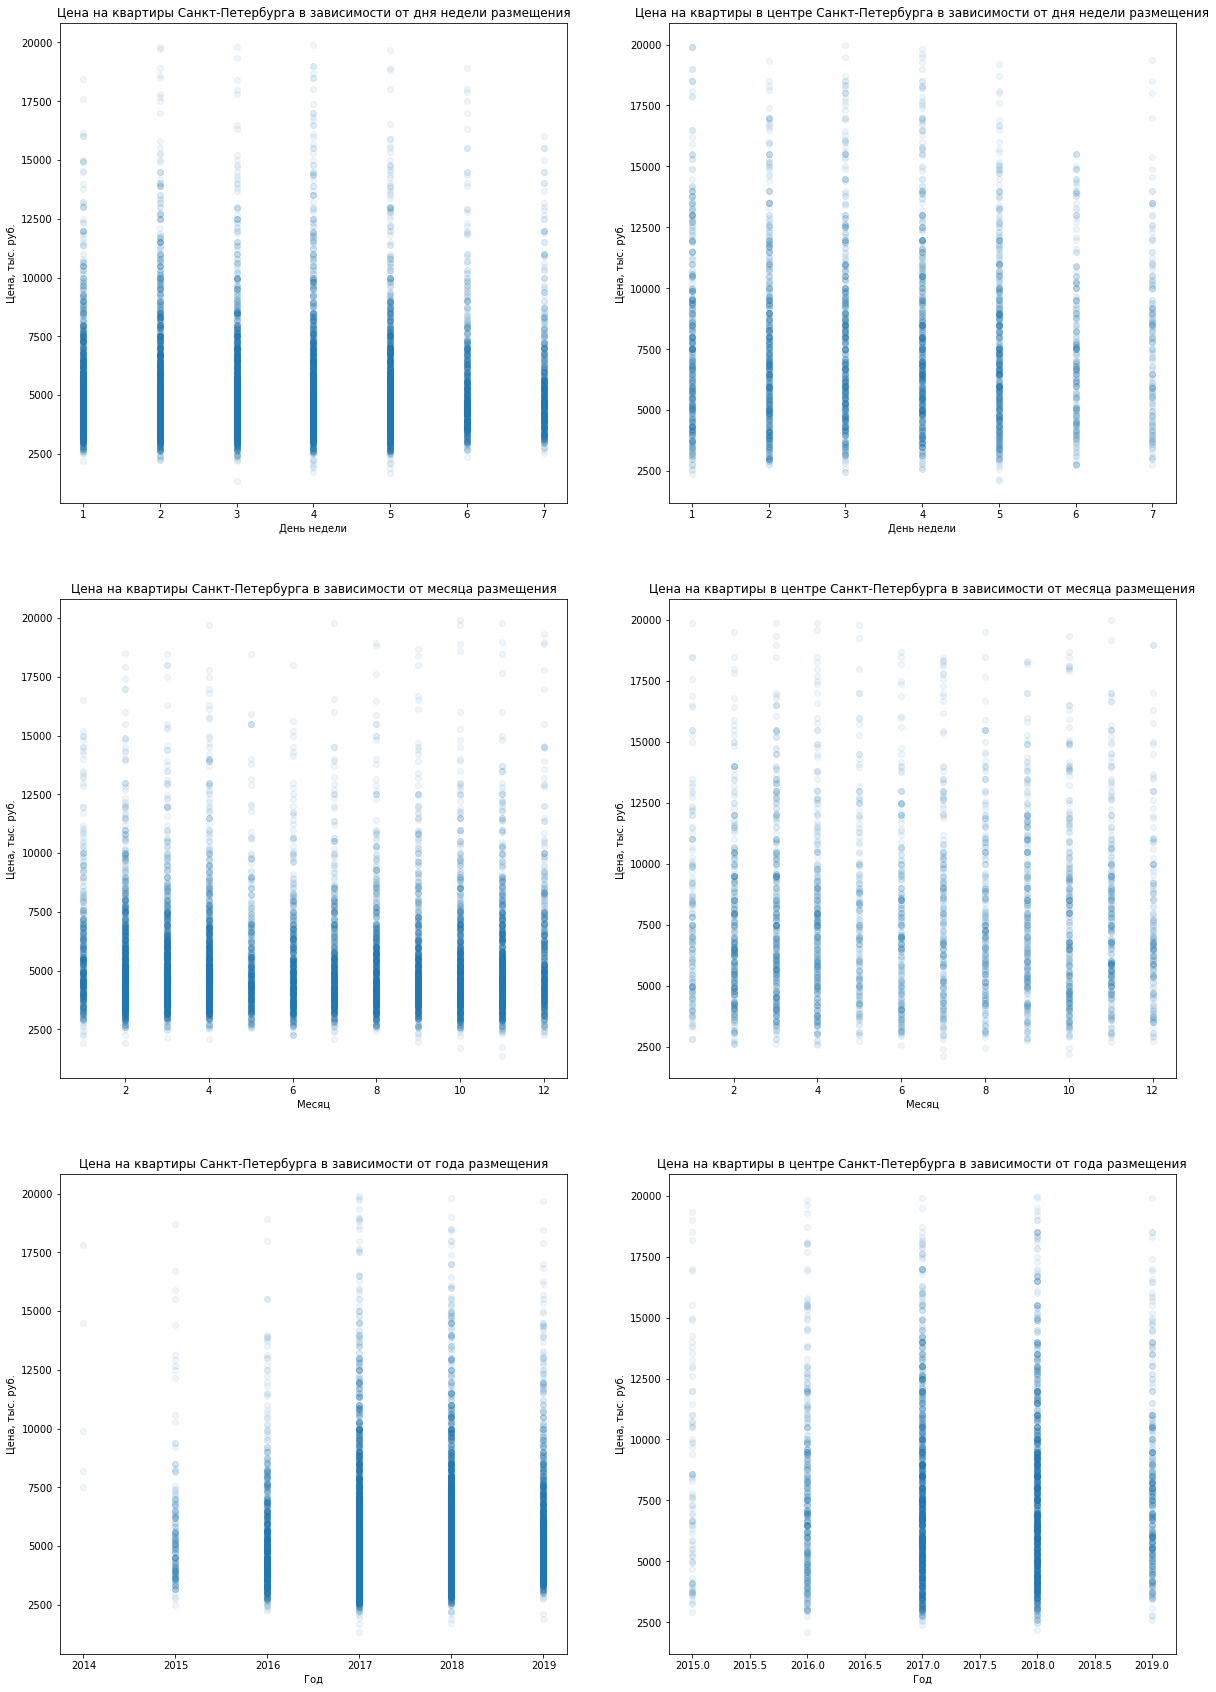

In [61]:
#Определяем различия в цене в зависимости от дня, месяца, года размещения для квартир в Санкт-Петербурге и центре Санкт-Петербурга
plt.figure(figsize=(20, 30))

plt.subplot(3, 2, 1)
plt.scatter(x=data_spb_not_center['first_weekday_exposition'], y=data_spb_not_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры Санкт-Петербурга в зависимости от дня недели размещения")
plt.xlabel("День недели")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 3)
plt.scatter(x=data_spb_not_center['first_month_exposition'], y=data_spb_not_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры Санкт-Петербурга в зависимости от месяца размещения")
plt.xlabel("Месяц")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 5)
plt.scatter(x=data_spb_not_center['first_year_exposition'], y=data_spb_not_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры Санкт-Петербурга в зависимости от года размещения")
plt.xlabel("Год")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 2)
plt.scatter(x=data_spb_center['first_weekday_exposition'], y=data_spb_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры в центре Санкт-Петербурга в зависимости от дня недели размещения")
plt.xlabel("День недели")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 4)
plt.scatter(x=data_spb_center['first_month_exposition'], y=data_spb_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры в центре Санкт-Петербурга в зависимости от месяца размещения")
plt.xlabel("Месяц")
plt.ylabel("Цена, тыс. руб.")

plt.subplot(3, 2, 6)
plt.scatter(x=data_spb_center['first_year_exposition'], y=data_spb_center['last_price'], alpha=0.07)
plt.title("Цена на квартиры в центре Санкт-Петербурга в зависимости от года размещения")
plt.xlabel("Год")
plt.ylabel("Цена, тыс. руб.")

plt.show()


Основная часть объявлений квартир в центре также публикуется с понедельника по пятницу, с февраля по апрель и с сентября по ноябрь. Большая часть проданных объектов также были размещены с 2017 по 2018 гг. Видимых различий с основным датасетом нет.

### Вывод

Квартиры в центре отличаются от других объектов в городе. Цена на них выше, встречается больше квартир с 4,5 комнатами, квартиры с потолками 3-3.5 метра также встречаются чаще. Расстояние до географического центра города имеет не такое большое значение, если квартира расположена в радиусе 9 км.

### 10. Общий вывод

По итогам исследовании мы определили, что в представленном наборе данных имеются пропуски и аномальные значения. Пропуски в столбце со значениями высоты потолков были заменены значениями из похожих типовых квартир. Пропуски жилой площади заменены на значения общей площади за вычетом кухни. Незначительные пропуски как количество этажей, апартаменты и др. были или исключены, или заменены самым распространенным либо медианным значенем. Пропуски балконов или расстояний до парков/аэропортов мы приняли за отсутствие таковых в данных объекта и не пытались их заполнить какими-то усредненными значениями. К аномальным значениям можно отнести сроки размещения объектов, некоторые значения площади или высоты потолков, все они были проработаны. Данные показали нам, что большинство объектов являются 1,2,3 комнатными квартирами, соответственно имеют площадь от 40 до 69 м2, цену от 3,4 до 6,75 млн, стоимость квадратного метра от 25000 до 160000, высоту потолков от 2.55 до 2.75 м. Цена положительно зависит от площади и количества комнат, и отрицательно от расстояния от центра. Дешевле всего стоят квартиры на первых этажах, затем на последних, и самые дорогие - квартиры на других этажах. Зависимости цены от времени публикации нет. К наиболее дорогим пригородам относятся Пушкин и деревня Кудрово, а к дешевым - Гатчина, Всеволожск и Выборг. Это может быть связано с тем, что эти пригороды находятся территориально ближе к Санкт-Петербургу, а также обладают обладают рядом преимуществ. Ценовая граница центра проходит на отметке 9 км. После этой отметки снижение цены замедляется. Более отчетливо это видно на параметре цены объекта, чем на параметре квадратный метр. Это может быть связано с различием площади объектов в центре и за пределами. Квартиры в центре отличаются большей площадью, более высокой ценой, количеством комнат и высотой потолков. Цена для квартир по площади в центре имеет меньший разброс, чем за пределами центра (поскольку в таких объектах более важен сам факт расположения).